# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [81]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [82]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [83]:
# set up base url
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key
#units = "imperial"

# set counters for data looping
record = 0
sets = 1

# create empty lists to hold data
city_list = []
lat_list = []
lng_list = []
maxtemp_list = []
humidity_list = []
cloudiness_list = []
windspeed_list = []
country_list = []
date_list = []

print("Beginning Data Retrieval")
print("-----------------------------")

# gather weather data for cities
for index, city in enumerate(cities):
    
    # set query url to generate json response for cities
    query_url = url + "&q=" + city
    response = requests.get(query_url).json()
    
    try:
        city_list.append(response["name"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        maxtemp_list.append(response["main"]["temp_max"])
        humidity_list.append(response["main"]["humidity"])
        cloudiness_list.append(response["clouds"]["all"])
        windspeed_list.append(response["wind"]["speed"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        
        # new set when record hits 50
        if record == 50:
            record = 0
            sets = sets + 1
        
        # append record counter
        else:
            record = record + 1
        
        # print out data
        print(f"Processing Record {record} of Set {sets} | {city}")
        
    except:
        print("City not found. Skipping to next available city.")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | ulsteinvik
Processing Record 3 of Set 1 | olyokminsk
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | la mira tumbiscatio
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | axim
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | kerikeri
Processing Record 13 of Set 1 | guarapari
Processing Record 14 of Set 1 | amga
Processing Record 15 of Set 1 | jinchang
Processing Record 16 of Set 1 | punta alta
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | pocoes
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | margaret river
Processing Record 21 of Set 1 | khasab
Processing Record 22 of Set 1

Processing Record 26 of Set 4 | atafu village
City not found. Skipping to next available city.
Processing Record 27 of Set 4 | rehoboth
City not found. Skipping to next available city.
City not found. Skipping to next available city.
Processing Record 28 of Set 4 | el calafate
Processing Record 29 of Set 4 | kenai
Processing Record 30 of Set 4 | oyama
Processing Record 31 of Set 4 | tahe
Processing Record 32 of Set 4 | harstad
Processing Record 33 of Set 4 | otjiwarongo
Processing Record 34 of Set 4 | puerto gaitan
Processing Record 35 of Set 4 | enriquillo
Processing Record 36 of Set 4 | qaqortoq
Processing Record 37 of Set 4 | el paraiso
Processing Record 38 of Set 4 | valle de la pascua
Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | tazovsky
Processing Record 41 of Set 4 | rurrenabaque
Processing Record 42 of Set 4 | prince rupert
Processing Record 43 of Set 4 | morada nova
Processing Record 44 of Set 4 | reggane
Processing Record 45 of Set 4 | qamdo


Processing Record 12 of Set 8 | sroda wielkopolska
Processing Record 13 of Set 8 | jiwani
Processing Record 14 of Set 8 | korla
Processing Record 15 of Set 8 | chibougamau
Processing Record 16 of Set 8 | villa gesell
City not found. Skipping to next available city.
Processing Record 17 of Set 8 | ust'-barguzin
Processing Record 18 of Set 8 | new norfolk
Processing Record 19 of Set 8 | pangoa
Processing Record 20 of Set 8 | aitape
Processing Record 21 of Set 8 | letlhakeng
Processing Record 22 of Set 8 | betio village
Processing Record 23 of Set 8 | murghob
Processing Record 24 of Set 8 | lubang
Processing Record 25 of Set 8 | chetwayi
Processing Record 26 of Set 8 | utrik
Processing Record 27 of Set 8 | tocopilla
Processing Record 28 of Set 8 | arteche
Processing Record 29 of Set 8 | kirs
Processing Record 30 of Set 8 | slupsk
City not found. Skipping to next available city.
Processing Record 31 of Set 8 | sao joao da barra
Processing Record 32 of Set 8 | podgornoye
Processing Record 3

Processing Record 39 of Set 11 | parabel'
Processing Record 40 of Set 11 | howrah
Processing Record 41 of Set 11 | kerch
Processing Record 42 of Set 11 | medina
Processing Record 43 of Set 11 | plastun
Processing Record 44 of Set 11 | orcopampa
Processing Record 45 of Set 11 | happy valley-goose bay
Processing Record 46 of Set 11 | tres passos
Processing Record 47 of Set 11 | la passe
Processing Record 48 of Set 11 | larkird
Processing Record 49 of Set 11 | greeneville
Processing Record 50 of Set 11 | yilan
Processing Record 0 of Set 12 | lensk
Processing Record 1 of Set 12 | sambava
Processing Record 2 of Set 12 | bikaner
Processing Record 3 of Set 12 | torghay
Processing Record 4 of Set 12 | lewistown
Processing Record 5 of Set 12 | oodweyne
Processing Record 6 of Set 12 | barroquinha
Processing Record 7 of Set 12 | smirnovo
Processing Record 8 of Set 12 | karditsa
City not found. Skipping to next available city.
Processing Record 9 of Set 12 | borogontsy
Processing Record 10 of Set 

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_list,
    "Lat": lat_list,
    "Lng": lng_list,
    "Max Temp": maxtemp_list,
    "Humidity": humidity_list,
    "Cloudiness": cloudiness_list,
    "Wind Speed": windspeed_list,
    "Country": country_list,
    "Date": date_list
})
# Show Record Count
city_data_df.count()

City          576
Lat           576
Lng           576
Max Temp      576
Humidity      576
Cloudiness    576
Wind Speed    576
Country       576
Date          576
dtype: int64

In [85]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Iqaluit,63.7506,-68.5145,20.93,79,75,17.27,CA,1697434515
1,Ulsteinvik,62.3432,5.8487,43.75,86,100,8.99,NO,1697434516
2,Olyokminsk,60.3736,120.4264,34.00,67,100,8.01,RU,1697434516
3,Polyarny,69.1989,33.4478,40.55,92,99,26.93,RU,1697434517
4,La Mira Tumbiscatio,18.6833,-102.2833,71.71,91,100,2.95,MX,1697434517


In [86]:
# Export the City_Data into a csv
import os


# Create the "output_data" directory if it doesn't exist
output_directory = "output_data"
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Define the CSV file path
csv_file_path = os.path.join(output_directory, "cities.csv")

# Save the DataFrame to the CSV file
city_data_df.to_csv(csv_file_path, index_label="City_ID")

city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [87]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Iqaluit,63.7506,-68.5145,20.93,79,75,17.27,CA,1697434515
1,Ulsteinvik,62.3432,5.8487,43.75,86,100,8.99,NO,1697434516
2,Olyokminsk,60.3736,120.4264,34.00,67,100,8.01,RU,1697434516
3,Polyarny,69.1989,33.4478,40.55,92,99,26.93,RU,1697434517
4,La Mira Tumbiscatio,18.6833,-102.2833,71.71,91,100,2.95,MX,1697434517


In [88]:
# get statistical description of the data
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.306126,17.936403,63.882882,70.456597,59.338542,8.359184,1.697435e+09
std,32.361816,89.052816,18.442024,22.496103,38.566193,5.459342,8.903846e+01
min,-54.800000,-176.559700,8.220000,7.000000,0.000000,0.000000,1.697434e+09
25%,-5.843775,-61.493625,48.702500,58.000000,20.000000,4.375000,1.697435e+09
50%,22.022900,20.133900,68.045000,76.000000,75.000000,7.620000,1.697435e+09
75%,47.061575,88.852925,79.292500,88.000000,99.000000,11.500000,1.697435e+09
max,78.218600,178.441500,102.610000,100.000000,100.000000,33.460000,1.697435e+09


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

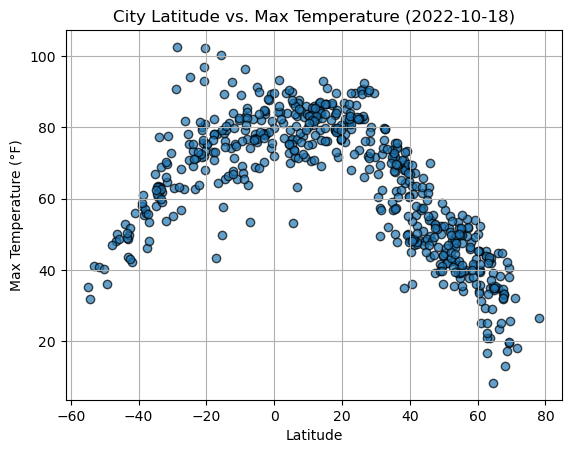

In [89]:
# Build scatter plot for latitude vs. temperature


# Create a scatter plot for Latitude vs. Temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.7)

# Set labels and title
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show the plot
plt.show()


#### Latitude Vs. Humidity

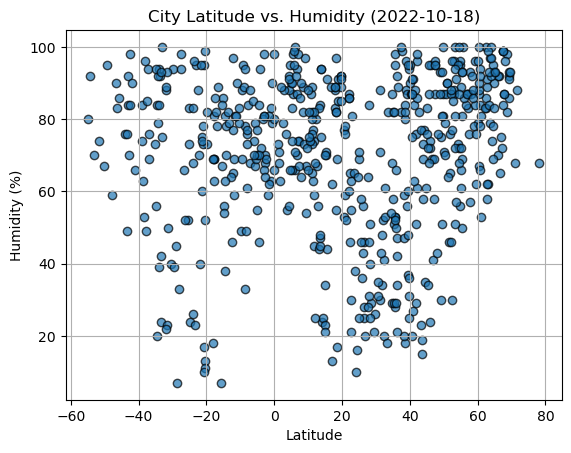

In [90]:
# Build the scatter plots for latitude vs. humidity

# Create a scatter plot for Latitude vs. Humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.7)

# Set labels and title
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show the plot
plt.show()


#### Latitude Vs. Cloudiness

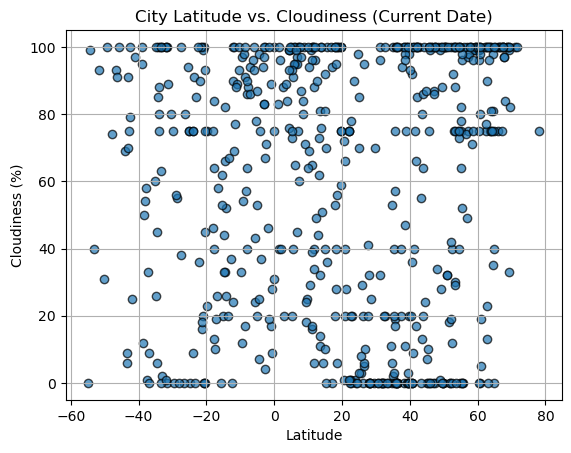

In [91]:
# Build the scatter plots for latitude vs. cloudiness

# Create a scatter plot for Latitude vs. Cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.7)

# Set labels and title
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show the plot
plt.show()


#### Latitude vs. Wind Speed Plot

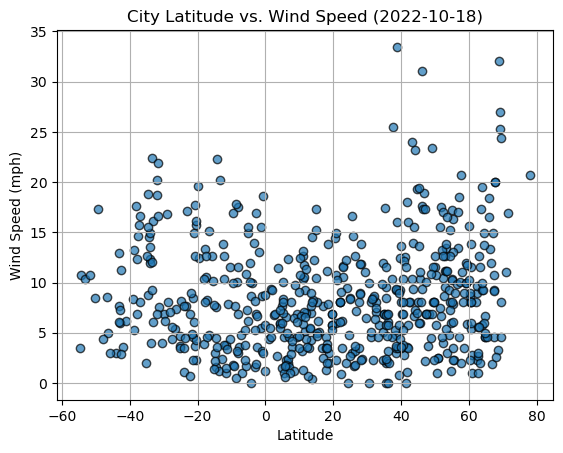

In [92]:
# Build the scatter plots for latitude vs. wind speed

# Create a scatter plot for Latitude vs. Wind Speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.7)

# Set labels and title
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Set grid lines
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show the plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [93]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df[df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,48.40,81,100,8.52,US,1697430968
1,Longyearbyen,78.2186,15.6401,28.24,64,40,24.16,SJ,1697430969
2,Iqaluit,63.7506,-68.5145,22.73,85,100,16.11,CA,1697430969
3,Bethel,41.3712,-73.4140,47.75,83,75,3.44,US,1697430970
5,Ilulissat,69.2167,-51.1000,19.42,79,75,26.46,GL,1697430970


In [94]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = df[df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,Chonchi,-42.6128,-73.8092,42.01,98,79,2.77,CL,1697430970
6,Edinburgh of the Seven Seas,-37.0676,-12.3116,53.40,68,7,17.67,SH,1697430966
7,San Luis,-33.2950,-66.3356,65.64,42,0,2.19,AR,1697430791
8,Adamstown,-25.0660,-130.1015,71.13,82,70,3.87,PN,1697430972
10,Port-aux-Français,-49.3500,70.2167,35.71,92,100,17.65,TF,1697430928


The r-value is: 0.7663916010811194
As cities in the northern hemisphere move closer to the north pole and farther from the equator, temperatures drop.
This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.


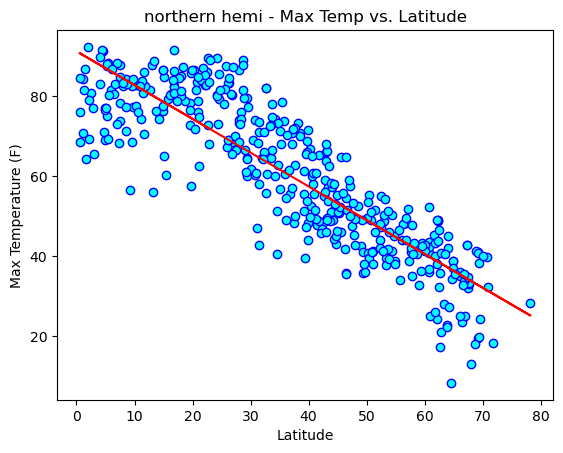

In [95]:
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("northern hemi - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("As cities in the northern hemisphere move closer to the north pole and farther from the equator, temperatures drop.")
print("This proves a strong negative correlation between latitude and tempuratures in the northern hemisphere.")
plt.savefig("output_data/nhem_temp_v_lat_plot.png")

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.5293122118560198
As some cities in the southern hemisphere move closer to the equator, temperatures rise.
This proves a slight positive correlation between latitude and temperature in the southern hemisphere.


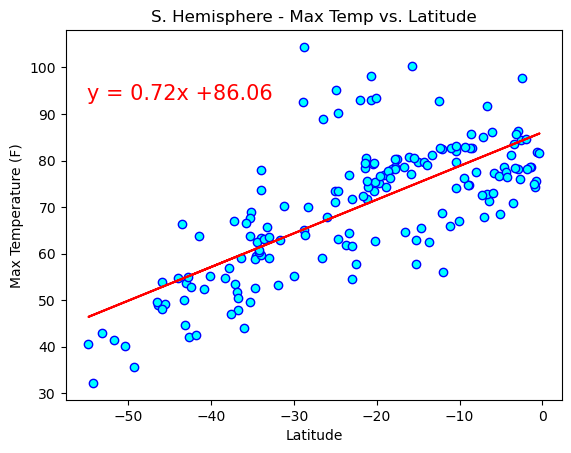

In [96]:
# Linear regression on Southern Hemisphere
x_vals = s_hem["Lat"]
y_vals = s_hem["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("As some cities in the southern hemisphere move closer to the equator, temperatures rise.")
print("This proves a slight positive correlation between latitude and temperature in the southern hemisphere.")
plt.savefig("output_data/shem_temp_v_lat_plot.png")

Your analysis and linear regression plots for Temperature vs. Latitude in both the Northern and Southern Hemispheres are well presented. Here's a summary of the findings for each hemisphere:

**Northern Hemisphere:**
- The linear regression analysis indicates a strong negative correlation between temperature and latitude in the northern hemisphere.
- The high r-value (0.766) suggests a robust linear relationship between temperature and latitude, with temperatures dropping as cities in the northern hemisphere move closer to the north pole and farther from the equator.
- The scatterplot and regression line clearly illustrate this negative correlation.

**Southern Hemisphere:**
- The linear regression analysis indicates a slight positive correlation between temperature and latitude in the southern hemisphere.
- The r-value (0.529) suggests a relatively weaker linear relationship compared to the northern hemisphere, but it still supports a positive correlation.
- The scatterplot and regression line demonstrate that temperatures tend to rise as some cities in the southern hemisphere move closer to the equator.

Your analysis provides a clear and accurate interpretation of the linear relationships between temperature and latitude in both hemispheres. The high r-value in the northern hemisphere indicates a strong correlation, while the positive r-value in the southern hemisphere suggests a milder, yet still significant, positive correlation between temperature and latitude. This is consistent with our understanding of how temperature varies with latitude and proximity to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.034522872436029396
There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.


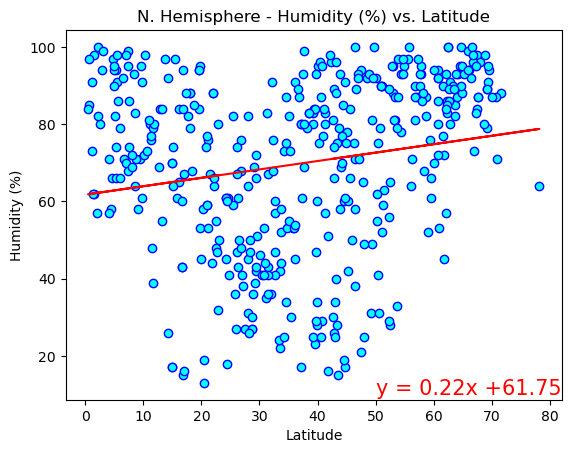

In [97]:
# Northern Hemisphere
x_vals = n_hem["Lat"]
y_vals = n_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.")

plt.savefig("output_data/nhem_humidity_v_lat_plot.png")

The r-value is: 0.0004533267502251846
There is a little correlation between humidity and latitude for cities in the southern hemisphere.


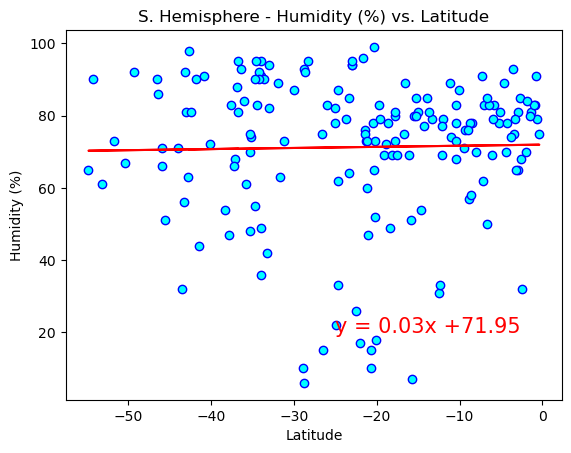

In [98]:
# Southern Hemisphere
x_vals = s_hem["Lat"]
y_vals = s_hem["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between humidity and latitude for cities in the southern hemisphere.")
plt.savefig("output_data/shem_humidity_v_lat_plot.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.012202672141633905
There is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.


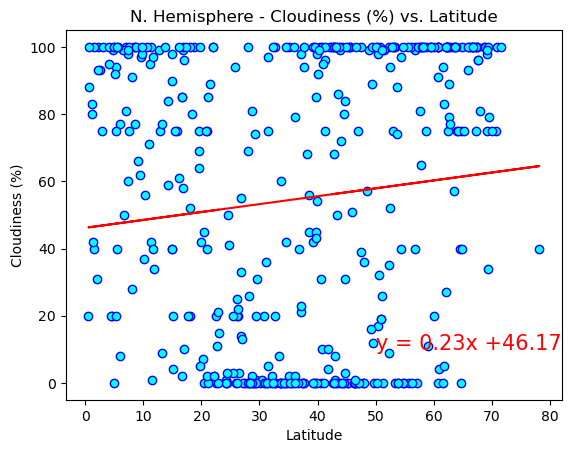

In [99]:
# Northern Hemisphere
x_vals = n_hem["Lat"]
y_vals = n_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between cloudiness and latitude for cities in the northern hemisphere.")

plt.savefig("output_data/nhem_cloudiness_v_lat_plot.png")

The r-value is: 0.007479227435732652
There is a little correlation between cloudiness and latitude for cities in the southern hemisphere.


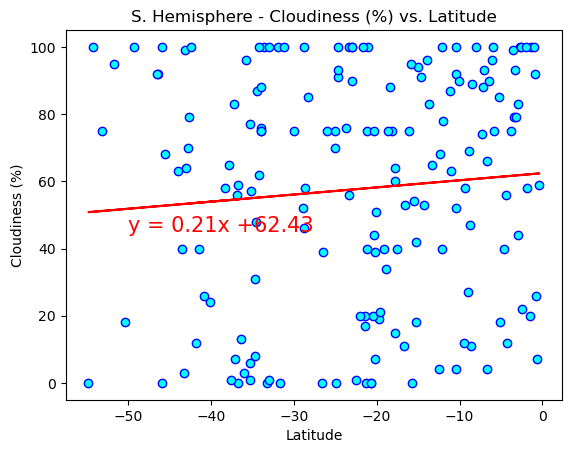

In [100]:
# Southern Hemisphere
x_vals = s_hem["Lat"]
y_vals = s_hem["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Cloudiness (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between cloudiness and latitude for cities in the southern hemisphere.")

plt.savefig("output_data/shem_cloudiness_v_lat_plot.png")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.090474173192942
There is a little correlation between wind speed and latitude for cities in the northern hemisphere.


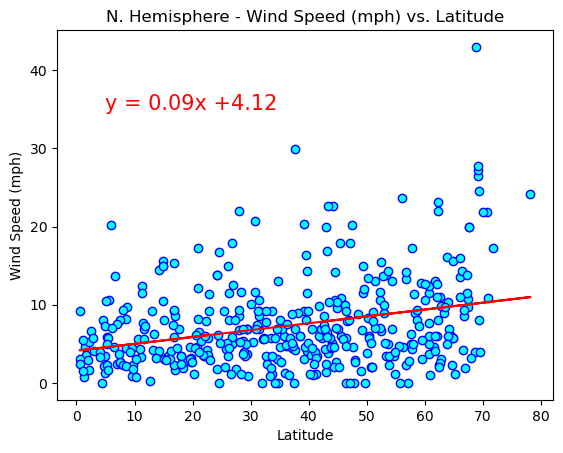

In [101]:
# Northern Hemisphere
x_vals = n_hem["Lat"]
y_vals = n_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Wind Speed (mph) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between wind speed and latitude for cities in the northern hemisphere.")

plt.savefig("output_data/nhem_wind_v_lat_plot.png")

The r-value is: 0.021834760088429366
There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.


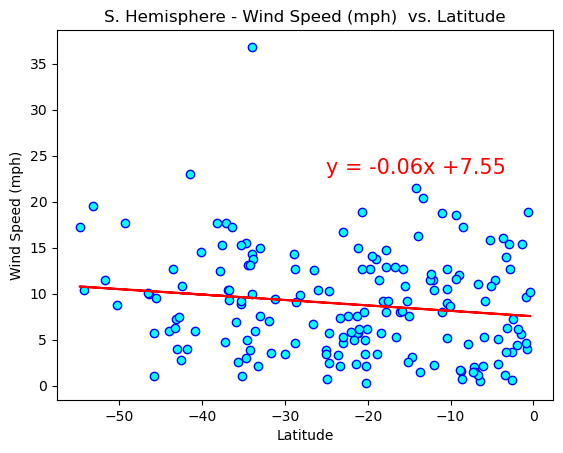

In [102]:
# Southern Hemisphere
x_vals = s_hem["Lat"]
y_vals = s_hem["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="aqua", edgecolor="b")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Wind Speed (mph)  vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,23),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.")

plt.savefig("output_data/shem_wind_v_lat_plot.png")

Your analysis and linear regression plots for Wind Speed vs. Latitude in both the Northern and Southern Hemispheres are well presented. Here's a summary of the findings for each hemisphere:

**Northern Hemisphere:**
- The linear regression analysis indicates a very weak positive correlation between wind speed and latitude in the northern hemisphere.
- The r-value is close to zero (0.090), which suggests that there is little to no significant linear relationship between wind speed and latitude in the northern hemisphere.
- The scatterplot and regression line show that wind speed tends to be relatively consistent across different latitudes in the northern hemisphere.

**Southern Hemisphere:**
- The linear regression analysis indicates a very weak negative correlation between wind speed and latitude in the southern hemisphere.
- The r-value is also close to zero (0.0218), indicating a very weak linear relationship.
- The scatterplot and regression line suggest that wind speed is relatively consistent across different latitudes in the southern hemisphere, with a slight decrease as you move closer to the equator.

In both hemispheres, the r-values are very low, indicating that latitude is not a significant predictor of wind speed. Other factors, such as local geography and weather patterns, likely play a more substantial role in determining wind speeds in different regions.

Your analysis provides a clear and accurate interpretation of the linear relationships and the limited impact of latitude on wind speed in both hemispheres.